<a href="https://colab.research.google.com/github/Magic-Freeza/data_cleaning_/blob/main/RID1234_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas extras ao colab


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9904807da7717abd684bfeb8e6c12cfa965b6f27844782c2c86f4a5232737ef4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

from google.colab import files
import chardet #Biblioteca para detecção do melhor formato (encoding) para abrir o df principal

# Leitura do Base

In [ ]:
# Detecção do melhor formato (encoding) para abrir o df principal
with open("/content/data.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result["encoding"])  # Exibe a codificação detectada

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("/content/data.csv", encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Analise inicial do df

Principais alertas gerados pelo Profile report:
- Dataset has 4879 (0.9%) duplicate rows	Duplicates
- Country is highly imbalanced (85.9%)	Imbalance
- CustomerID has 135080 (24.9%) missing values	Missing
- UnitPrice is highly skewed (γ1 = 186.5069717)	Skewed

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Tratando nulos

Possuimos 24,93% linhas da colunas CostumerID com valores nulos, portanto não conseguimos definir as metricas alvo para estes clientes. Portanto a ação mais adequada é dropar esses dados, alem de tomar as ações abaixo para proximas analises.

- Retornar esta informação para area responsavél por gerar a base para entender os motivos desses valores nulos.
- Não é possivel ajustar essas informações por que se não estariamos adulterando estar informações.
- Podemos apresentar valores medios para fins de comparação, mas não como uma infoemação confiavel.

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.drop(df.loc[df["CustomerID"].isna()].index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
a = ((541908 - 135080)/541908)-1

print(f"{(a*100):.2f}%")

-24.93%


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Tratando dados duplicados

Como iremos definir as metricas alvo por cliente não é interresante termos linhas duplicadas em nossa base de dados. Portanteo iremos dropar todas as linhas duplicadas.

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)

# Tratando as colunas Quantity e Unit Price

Informações nulas ou negativas não são interressante para essas duas colunas, portanto temos que trata-las, o desafio indica simplesmente droparmos estas informações, porém vou avaliar a possibilidade de converter os valores negativos para valores possitivos e criar dois df's e seguir com a analise de ambos para que possamos definir ao final qual faz mais sentido.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df_desafio = df[(df['UnitPrice']>0)&(df['Quantity']>0)]

In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df_alternativo = df[(df['UnitPrice']<0)|(df['Quantity']<0)]
df_alternativo[['UnitPrice', 'Quantity']] = df_alternativo[['UnitPrice', 'Quantity']].abs()
df_alternativo = pd.concat([df_alternativo, df_desafio])

df_alternativo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 141 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401564 non-null  object 
 1   StockCode    401564 non-null  object 
 2   Description  401564 non-null  object 
 3   Quantity     401564 non-null  int64  
 4   InvoiceDate  401564 non-null  object 
 5   UnitPrice    401564 non-null  float64
 6   CustomerID   401564 non-null  float64
 7   Country      401564 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


<ipython-input-133-01c5f0d1bbd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alternativo[['UnitPrice', 'Quantity']] = df_alternativo[['UnitPrice', 'Quantity']].abs()


# Ajustando o tipo de cada coluna


In [ ]:
schema = {
    "InvoiceNo": str,
    "StockCode": str,
    "Description": str,
    "Quantity": int,
    "InvoiceDate": "datetime64",
    "UnitPrice": float,
    "CustomerID": int,
    "Country": str
}


In [ ]:
cols_str = [col for col, dtype in schema.items() if dtype == str]
cols_num_int = [col for col, dtype in schema.items() if (dtype == int)]
cols_num_float = [col for col, dtype in schema.items() if (dtype == float)]
cols_date = ["InvoiceDate"]

In [ ]:
df_desafio[cols_str] = df_desafio[cols_str].astype(str)
df_desafio[cols_num_float] = df_desafio[cols_num_float].astype(float)
df_desafio["InvoiceDate"] =  pd.to_datetime(df_desafio['InvoiceDate'])

<ipython-input-159-fea4829a54f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio[cols_str] = df_desafio[cols_str].astype(str)
<ipython-input-159-fea4829a54f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio[cols_num_float] = df_desafio[cols_num_float].astype(float)
<ipython-input-159-fea4829a54f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_desafio[cols_num_int] = df_desafio[cols_num_int].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

<ipython-input-160-ae224eac2899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio[cols_num_int] = df_desafio[cols_num_int].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330862 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    330862 non-null  object        
 1   StockCode    330862 non-null  object        
 2   Description  330862 non-null  object        
 3   Quantity     330862 non-null  int64         
 4   InvoiceDate  330862 non-null  datetime64[ns]
 5   UnitPrice    330862 non-null  float64       
 6   CustomerID   330862 non-null  int64         
 7   Country      330862 non-null  object        
 8   total_price  330862 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 25.2+ MB


In [ ]:
df_desafio.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
total_price,0


# Tratando outliers

In [ ]:
df_desafio['CustomerID'] = df_desafio['CustomerID'].astype(str)

<ipython-input-163-05497b75a620>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio['CustomerID'] = df_desafio['CustomerID'].astype(str)


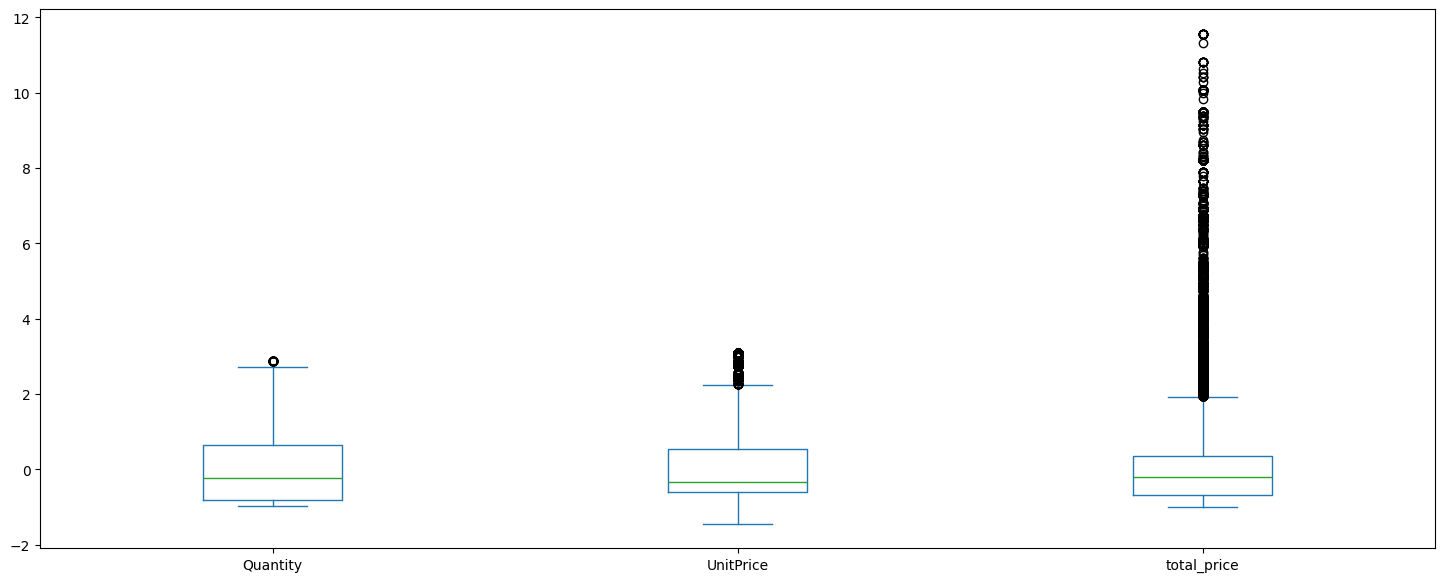

In [ ]:
numeric_cols = df_desafio.select_dtypes('number').columns

df_desafio[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
mask = ~df_desafio[numeric_cols].apply(is_outlier, axis=0)  # `axis=0` para aplicar por coluna
df_desafio[numeric_cols] = df_desafio[numeric_cols].loc[mask.all(axis=1)]  # Mantém apenas as linhas sem outliers

<ipython-input-166-d21320fa75e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio[numeric_cols] = df_desafio[numeric_cols].loc[mask.all(axis=1)]  # Mantém apenas as linhas sem outliers


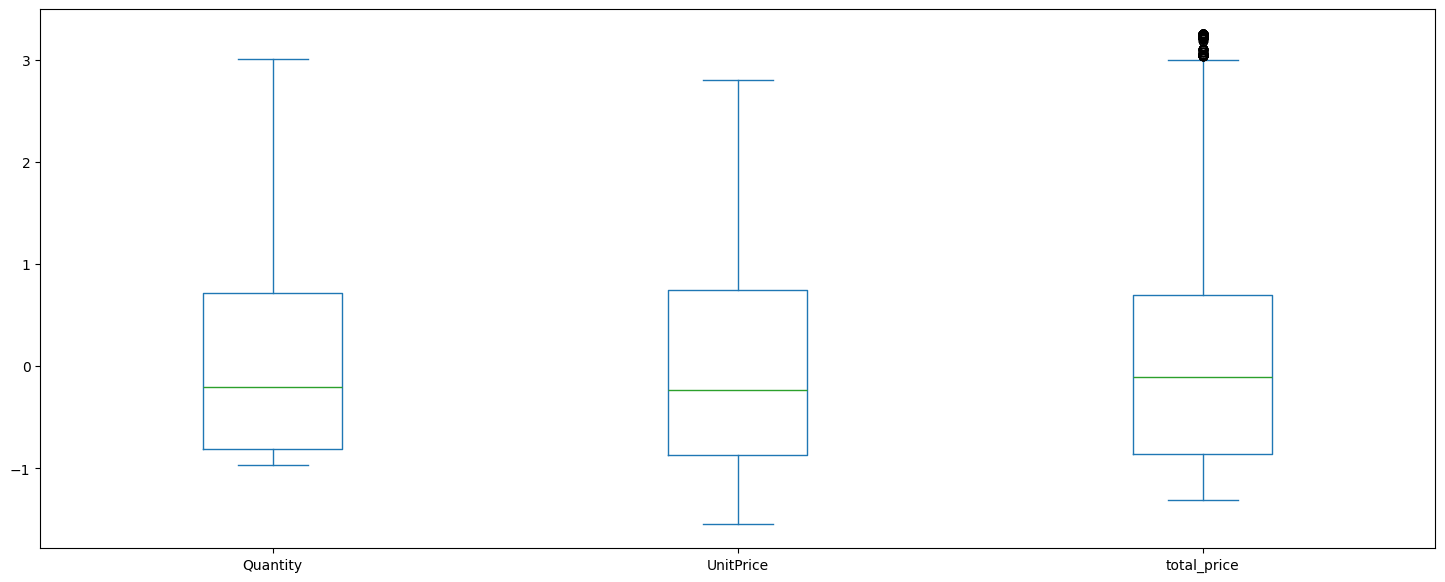

In [ ]:
df_desafio[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
df_desafio[numeric_cols].apply(is_outlier).sum()

,0
Quantity,0
UnitPrice,0
total_price,0


In [ ]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

In [ ]:
mask_Zscore = ~df_desafio[numeric_cols].apply(zscore_outlier, axis=0)  # `axis=0` para aplicar por coluna
df_desafio[numeric_cols] = df_desafio[numeric_cols].loc[mask_Zscore.all(axis=1)]  # Mantém apenas as linhas sem outliers

<ipython-input-170-0c0412a915e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio[numeric_cols] = df_desafio[numeric_cols].loc[mask_Zscore.all(axis=1)]  # Mantém apenas as linhas sem outliers


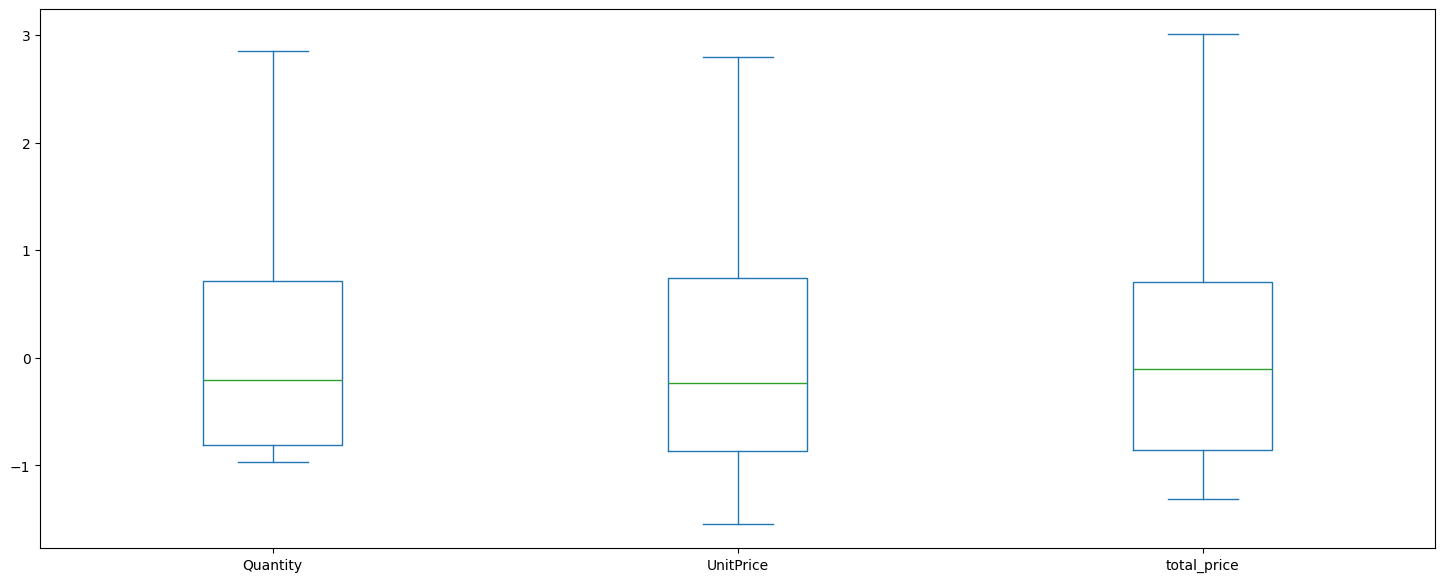

In [ ]:
df_desafio[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
df_desafio.describe()

,Quantity,InvoiceDate,UnitPrice,total_price
count,306683.000000,330862,306683.000000,306683.000000
mean,7.332591,2011-07-12 08:30:44.814575360,1.952199,10.777518
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,2.000000,2011-04-08 08:20:00,0.850000,3.750000
50%,6.000000,2011-08-03 09:30:00,1.650000,9.900000
75%,12.000000,2011-10-23 11:05:00,2.890000,16.500000
max,26.000000,2011-12-09 12:50:00,5.490000,35.400000
std,6.542549,NaN,1.264448,8.172999


In [ ]:
df_desafio['total_price'] = df_desafio['UnitPrice']*df_desafio['Quantity']

<ipython-input-173-ad5a69cad554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio['total_price'] = df_desafio['UnitPrice']*df_desafio['Quantity']


In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330862 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    330862 non-null  object        
 1   StockCode    330862 non-null  object        
 2   Description  330862 non-null  object        
 3   Quantity     306683 non-null  float64       
 4   InvoiceDate  330862 non-null  datetime64[ns]
 5   UnitPrice    306683 non-null  float64       
 6   CustomerID   330862 non-null  object        
 7   Country      330862 non-null  object        
 8   total_price  306683 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 25.2+ MB


In [ ]:
df_desafio.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,24179
InvoiceDate,0
UnitPrice,24179
CustomerID,0
Country,0
total_price,24179


In [ ]:
df_desafio.drop(df_desafio.loc[df_desafio["Quantity"].isna()].index, inplace=True)

<ipython-input-176-ef10794bddba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desafio.drop(df_desafio.loc[df_desafio["Quantity"].isna()].index, inplace=True)


In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306683 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    306683 non-null  object        
 1   StockCode    306683 non-null  object        
 2   Description  306683 non-null  object        
 3   Quantity     306683 non-null  float64       
 4   InvoiceDate  306683 non-null  datetime64[ns]
 5   UnitPrice    306683 non-null  float64       
 6   CustomerID   306683 non-null  object        
 7   Country      306683 non-null  object        
 8   total_price  306683 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 23.4+ MB


In [ ]:
df_desafio = df_desafio.reset_index()

# Calculo de data maxima do df_desafio

In [ ]:
df_desafio.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'total_price',
       'Invoice_date'],
      dtype='object')

In [ ]:
max_date = df_desafio['Invoice_date'].max()
max_date

Timestamp('2011-12-09 12:50:00')

# Graficos

## **Top 10 países com maior valor em vendas**


In [ ]:
df_desafio.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,Invoice_date
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
1,1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01 08:26:00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01 08:26:00


In [ ]:
top_coutries_total_price = df_desafio.groupby('Country')['total_price'].sum().sort_values(ascending=False)

In [ ]:
top_coutries_total_price = top_coutries_total_price.head(10)

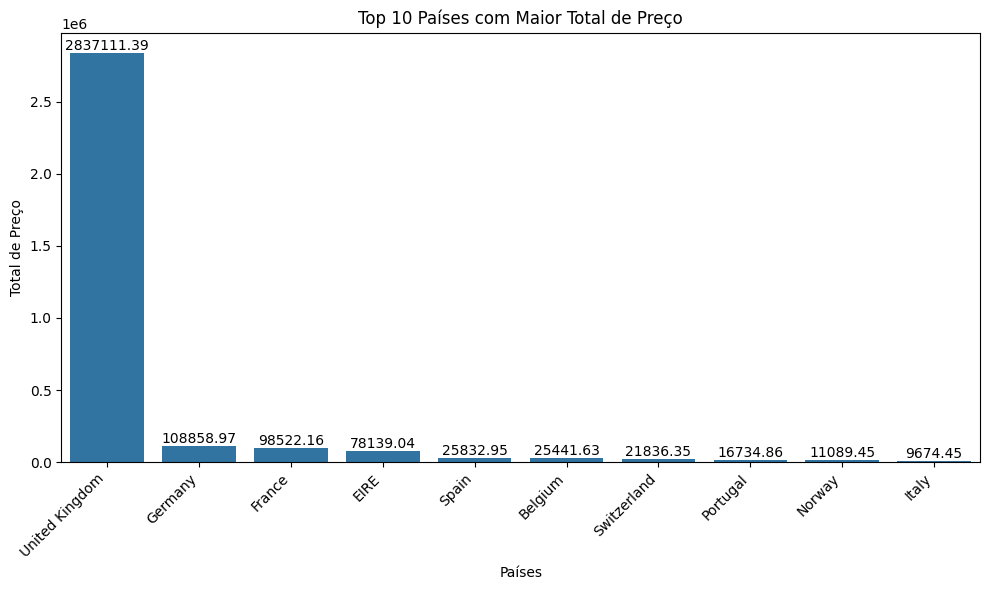

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_coutries_total_price.index, y=top_coutries_total_price.values)

# Adicionando os valores nas barras
for i, v in enumerate(top_coutries_total_price.values):
    ax.text(i, v + 500, f'{v:.2f}', ha='center', va='bottom', color='black')  # Ajuste de posição

plt.title('Top 10 Países com Maior Total de Preço')
plt.xlabel('Países')
plt.ylabel('Total de Preço')
plt.xticks(rotation=45, ha='right')  # Gira os rótulos no eixo X para melhorar a leitura
plt.tight_layout()
plt.show()

## Top 10 produtos mais vendidos

In [ ]:
df_desafio.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'total_price',
       'Invoice_date'],
      dtype='object')

In [ ]:
top_products_quantity = df_desafio.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [ ]:
top_products_quantity = top_products_quantity.head(10)
top_products_quantity

,Quantity
Description,
PACK OF 72 RETROSPOT CAKE CASES,14986.0
ASSORTED COLOUR BIRD ORNAMENT,10164.0
LUNCH BAG RED RETROSPOT,9655.0
WHITE HANGING HEART T-LIGHT HOLDER,9026.0
JAM MAKING SET PRINTED,8602.0
PACK OF 60 PINK PAISLEY CAKE CASES,8498.0
JUMBO BAG RED RETROSPOT,8457.0
60 TEATIME FAIRY CAKE CASES,8376.0
RED RETROSPOT WRAP,7447.0


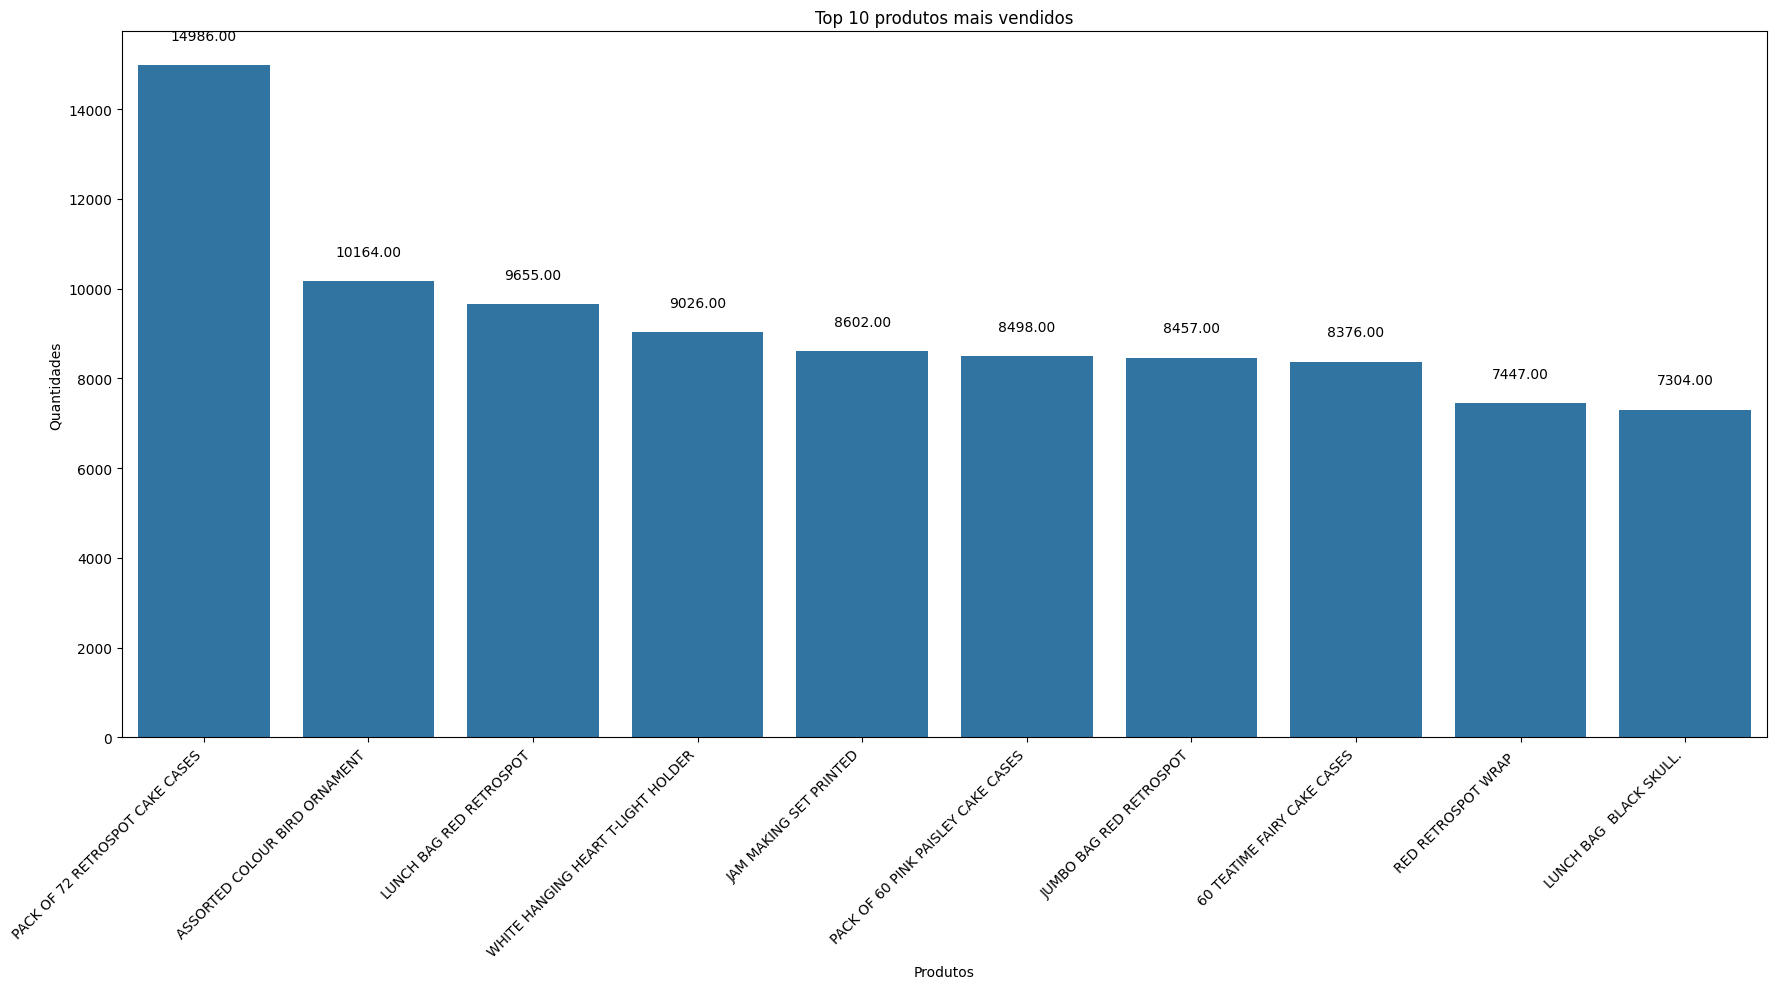

In [ ]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x=top_products_quantity.index, y=top_products_quantity.values)

# Adicionando os valores nas barras
for i, v in enumerate(top_products_quantity.values):
    ax.text(i, v + 500, f'{v:.2f}', ha='center', va='bottom', color='black')  # Ajuste de posição

plt.title('Top 10 produtos mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Quantidades')
plt.xticks(rotation=45, ha='right')  # Gira os rótulos no eixo X para melhorar a leitura
plt.tight_layout()
plt.show()

##Valor de venda total por mês

In [ ]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306683 entries, 0 to 306682
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         306683 non-null  int64         
 1   InvoiceNo     306683 non-null  object        
 2   StockCode     306683 non-null  object        
 3   Description   306683 non-null  object        
 4   Quantity      306683 non-null  float64       
 5   InvoiceDate   306683 non-null  datetime64[ns]
 6   UnitPrice     306683 non-null  float64       
 7   CustomerID    306683 non-null  object        
 8   Country       306683 non-null  object        
 9   total_price   306683 non-null  float64       
 10  Invoice_date  306683 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 25.7+ MB


In [ ]:
top_date_total_price = df_desafio.groupby(df_desafio['InvoiceDate'].dt.to_period('M'))['total_price'].sum().reset_index()

In [ ]:
top_date_total_price

,InvoiceDate,total_price
0,2010-12,206117.270
1,2011-01,177425.860
2,2011-02,170045.590
3,2011-03,227133.640
4,2011-04,190788.431
5,2011-05,247192.750
6,2011-06,225384.460
7,2011-07,224623.871
8,2011-08,242582.360
9,2011-09,367636.192


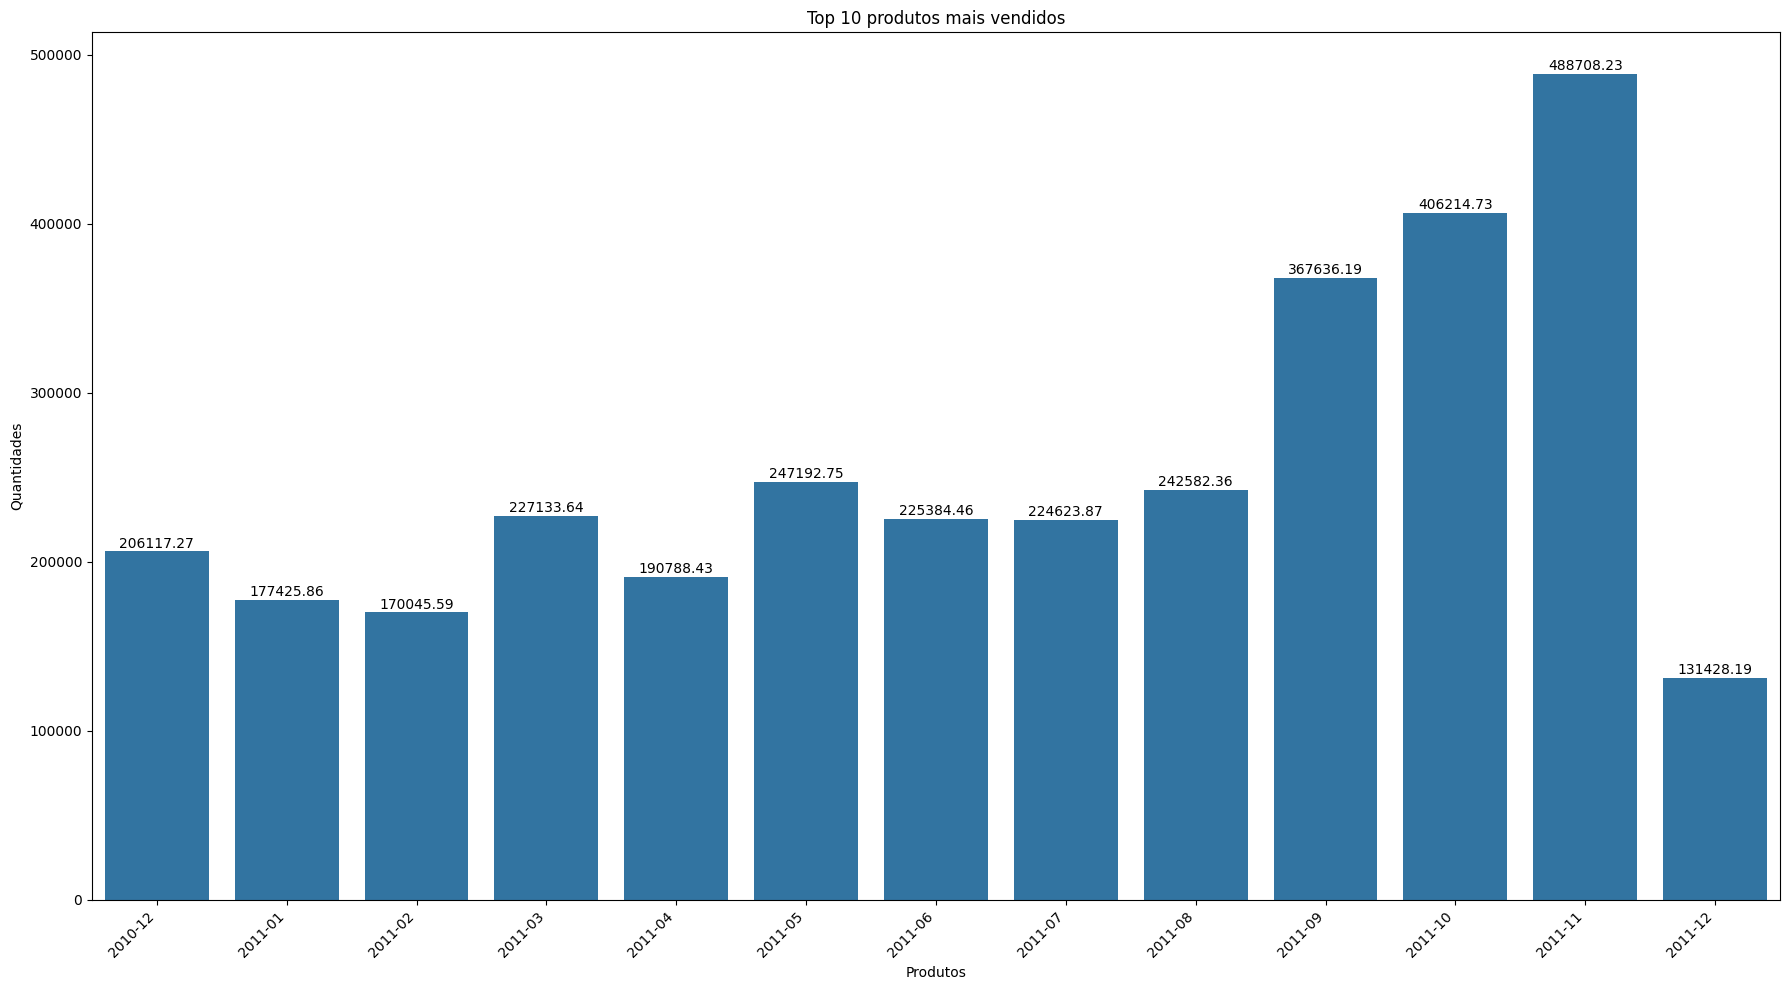

In [ ]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='InvoiceDate', y='total_price', data=top_date_total_price)

# Adicionando os valores nas barras
for i, v in enumerate(top_date_total_price['total_price']):
    ax.text(i, v + 500, f'{v:.2f}', ha='center', va='bottom', color='black')  # Ajuste de posição

plt.title('Top 10 produtos mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Quantidades')
plt.xticks(rotation=45, ha='right')  # Gira os rótulos no eixo X para melhorar a leitura
plt.tight_layout()
plt.show()

##Valor de venda total por mês e por país (considere apenas os top 10)

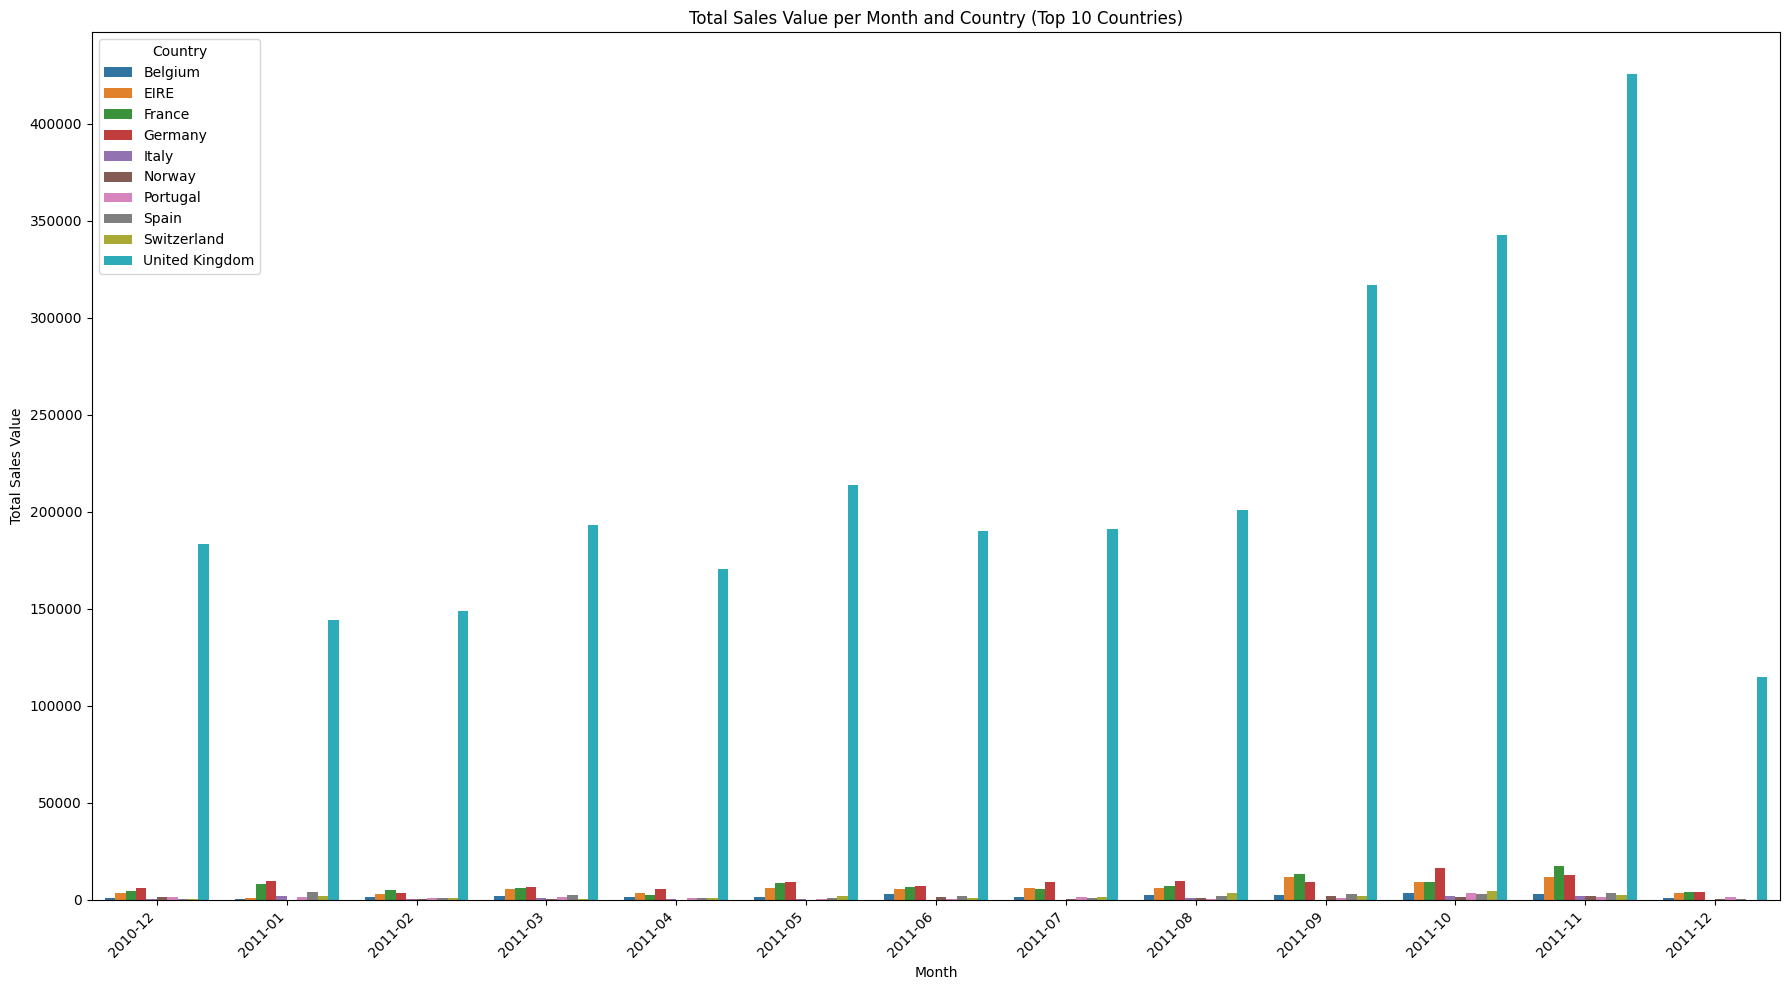

In [ ]:
# Group data by month, year, and country, then sum total price
sales_by_month_country = df_desafio.groupby([df_desafio['InvoiceDate'].dt.to_period('M'), 'Country'])['total_price'].sum().reset_index()

# Get the top 10 countries
top_10_countries = df_desafio['Country'].value_counts().nlargest(10).index

# Filter data for the top 10 countries
top_sales = sales_by_month_country[sales_by_month_country['Country'].isin(top_10_countries)]

# Create the plot
plt.figure(figsize=(18, 10))
sns.barplot(x='InvoiceDate', y='total_price', hue='Country', data=top_sales)
plt.title('Total Sales Value per Month and Country (Top 10 Countries)')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Cálculo do RFM

In [ ]:
df_desafio_RFM = df_desafio.groupby(['CustomerID','InvoiceNo','InvoiceDate']).agg({'total_price': 'sum'}).reset_index()

In [ ]:
df_desafio_RFM

,CustomerID,InvoiceNo,InvoiceDate,total_price
0,12347,537626,2010-12-07 14:57:00,449.59
1,12347,542237,2011-01-26 14:30:00,437.14
2,12347,549222,2011-04-07 10:43:00,325.00
3,12347,556201,2011-06-09 13:01:00,298.72
4,12347,562032,2011-08-02 08:48:00,342.66
...,...,...,...,...
16161,18283,579673,2011-11-30 12:59:00,220.31
16162,18283,580872,2011-12-06 12:02:00,208.00
16163,18287,554065,2011-05-22 10:39:00,387.18
16164,18287,570715,2011-10-12 10:23:00,412.72


In [ ]:
# Cálculo de Recência (R) - Diferença em dias entre a última compra do cliente e a data mais recente no dataset
df_desafio_RFM['Recency'] = (max_date - df_desafio_RFM['InvoiceDate']).dt.days

# Calcular Frequência (F) - Quantidade de compras feitas por cliente
frequency = df_desafio_RFM.groupby('CustomerID').agg(Frequency=('InvoiceNo', 'nunique'))

# Calcular Ticket Médio (M) - Média do total gasto por compra de cada cliente
monetary = df_desafio_RFM.groupby('CustomerID').agg(Monetary=('total_price', 'mean'))

In [ ]:
rfm_df = df_desafio_RFM.groupby('CustomerID').agg(Recency=('Recency', 'min')).reset_index()  # Recência (última compra)
rfm_df = rfm_df.merge(frequency, on='CustomerID')  # Frequência
rfm_df = rfm_df.merge(monetary, on='CustomerID')  # Valor Monetário

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,387.424286
1,12348,248,3,30.066667
2,12349,18,1,858.700000
3,12350,309,1,294.400000
4,12352,35,7,140.905714


In [ ]:
rfm_df.to_csv("arquivo.csv", index=False, encoding="utf-8")

In [ ]:

rfm_df.to_csv("e_commerce_rfm.csv", index=False)
files.download("e_commerce_rfm.csv")